#**PRN**: 220340128036
#**Name of Student**: PRASHANT SHUKLA
#**Date of Submission**: 19/07/2022

#Deep Neural Networks
#PG-DAI March 2022
#Evaluation Assignment 2
#Instruction:
##1.Read these instructions carefully.
##2.Please solve any one of the following questions.
##1.Question 1: Using DenseNet (any of the model) on and classify `Animals` dataset uploaded in shared drive
##2.Question 2: Solve Frozenlake4x4 using Monte Carlo First visit
##3.Your code shall be free of any compilation error. If your code fails in compilation, your submission will be rejected.
##4.Put comments to explain your code. Explain your steps in details.
##5.Do not REMOVE any cell.If you delete any cell, your submission may become invalid.
##6.Your code shall be within the lines marked for the purpose.
##7.Upload the file to the designated location by renaming as PRN_{PRN # last digits}_DNN_Eval_Assignment_2.ipynb**
**Important**:Your code shall be between lines marked thus.

#### START YOUR CODE

###Feel free to add cell

#### END YOUR CODE

#Typical Classification Report
##We are sure, you can do better than this. | |precision|recall|f1-score|support| |--:|--:|--:|--:|--:| |butterfly|0.99|0.99|0.99|372| |cow|0.93|0.93|0.93|323| |elephant|0.96|0.98|0.97|273| |sheep|0.97|0.92|0.94|335| |squirrel|0.97|0.99|0.98|336| |||||_| |accuracy| | |0.97|1639| |macro avg|0.96|0.97|0.96|1639| |weighted avg|0.97|0.97|0.97|1639|

#Question 1
#1.1. Import Statements
**Task 1:** Import all the libraries you may need for successful execution of your code.(2 marks)

In [ ]:

####Solutions:-

In [1]:
#### START YOUR CODE



### Import Libraries

import tensorflow as tf

import os

#import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
import matplotlib.cm as cm

from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet169
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

#### END YOUR CODE

#1.2. Global Parameters¶
**Task 2**: Declare Global Parameters.(3 marks)

In [ ]:

####Solutions:-

In [2]:
#### START YOUR CODE



RANDOM_STATE = 2022 # for initialization ----- REMEMBER: to remove at the time of promotion to production
tf.random.set_seed(RANDOM_STATE)

EPOCHS = 60 # number of cycles to run

BATCH_SIZE = 32 # inline of Training Rows being 60000

TEST_SIZE = 0.2

IMG_HEIGHT = 188

IMG_WIDTH = 188

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,10),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

CMAP = plt.cm.brg

plt.rcParams.update(params) # update rcParams



In [3]:
#Enabling GPU
physical_devices = tf.config.list_physical_devices('GPU') 

if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    
%matplotlib inline
#### END YOUR CODE

#1.3. Helper Function¶
#Following helper function is given for your convenience. Feel free to modify as deemed fit.

In [ ]:

####Solutions:-

In [4]:
def fn_plot_hist(hist_df):
    
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)

    ax = axes[0]

    hist_df.plot(y = [hist_df.columns[0],hist_df.columns[2]], ax = ax, colormap=CMAP)

    lossmin = hist_df[hist_df.columns[0]].min()

    testmin = hist_df[hist_df.columns[2]].min()

    # little beautification
    txtstr = "Min {}: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(hist_df.columns[0],
                                                                          lossmin,
                                                                          testmin) #text to plot

    # place a text box in upper left in axes coords

    ax.text(0.4, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    ax.set_xlabel("Epochs")

    ax.set_ylabel(hist_df.columns[0].capitalize())

    ax.grid();

    ax = axes[1]

    hist_df.plot( y = [hist_df.columns[1], hist_df.columns[3]], ax = ax, colormap=CMAP)

    # little beautification
    accmin = hist_df[hist_df.columns[1]].max()
    testmin = hist_df[hist_df.columns[3]].max()
    txtstr = "Max {}: \n Training : {:7.4f}\n Testing   : {:7.4f}".format(hist_df.columns[1],
                                                                                accmin,
                                                                                testmin) #text to plot

    # place a text box in upper left in axes coords

    ax.text(0.4, 0.5, txtstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(hist_df.columns[1].capitalize())
    ax.grid();
    plt.tight_layout()

In [5]:
def fn_plot_label(tr_ds, ts_ds):
    
    plt.figure(figsize = (75,25))
    
    plt.subplot(1,2,1)

    train_labels = tf.concat([y for x, y in tr_ds], axis = 0).numpy()
    
    unique, _, counts = tf.unique_with_counts(train_labels)
    
    plt.bar(range(len(unique)), counts, align='center',color = 'DarkBlue', alpha = 0.7)
    
    plt.title('Training Set')
    
    plt.xticks(range(len(unique)), class_names);
    plt.grid()


    plt.subplot(1,2,2)

    val_labels = tf.concat([y for x, y in ts_ds], axis = 0).numpy()
    
    unique, _, counts = tf.unique_with_counts(val_labels)
    
    plt.bar(range(len(unique)), counts, align='center', color = 'Orange', alpha = 0.7)
    
    plt.title('Test Set')
    
    plt.xticks(range(len(unique)), class_names)
    
    plt.grid()
    
    plt.show()

#1.4. Dataset Information:¶
###The dataset contains images of following animals in jpg format.

###Butterfly
###Cow
###Elephant
###Sheep
###Squirrel
#1.4.1 Load Data¶
** Task 3**: Load data provided in Animals folder. (30 marks)

Prepare training and testing sets from the folders and split in train_ds and test_ds.

**Note**: Use of any other dataset will make this submission invalid.

In [ ]:

####Solutions:-

In [6]:
#Mounting drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Unzipping the file
!unzip -q "/content/drive/MyDrive/Copy of animals.zip"

###Proper splitting:-

In [8]:


import pathlib

dataset_path = "/content/animals"
# load data and split in training and validation from a sub dir

# training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=2022,
    image_size=(188, 188),
    batch_size=32
)

# testing dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=2022,
    image_size=(188, 188),
    batch_size=32
    )

Found 8196 files belonging to 5 classes.
Using 6557 files for training.
Found 8196 files belonging to 5 classes.
Using 1639 files for validation.


####Displaying class names and plotting images

In [9]:
class_names = train_ds.class_names

print('Total: {:3d} Classes; namely : {:s}'.format(len(class_names), str(class_names)))

Total:   5 Classes; namely : ['butterfly', 'cow', 'elephant', 'sheep', 'squirrel']


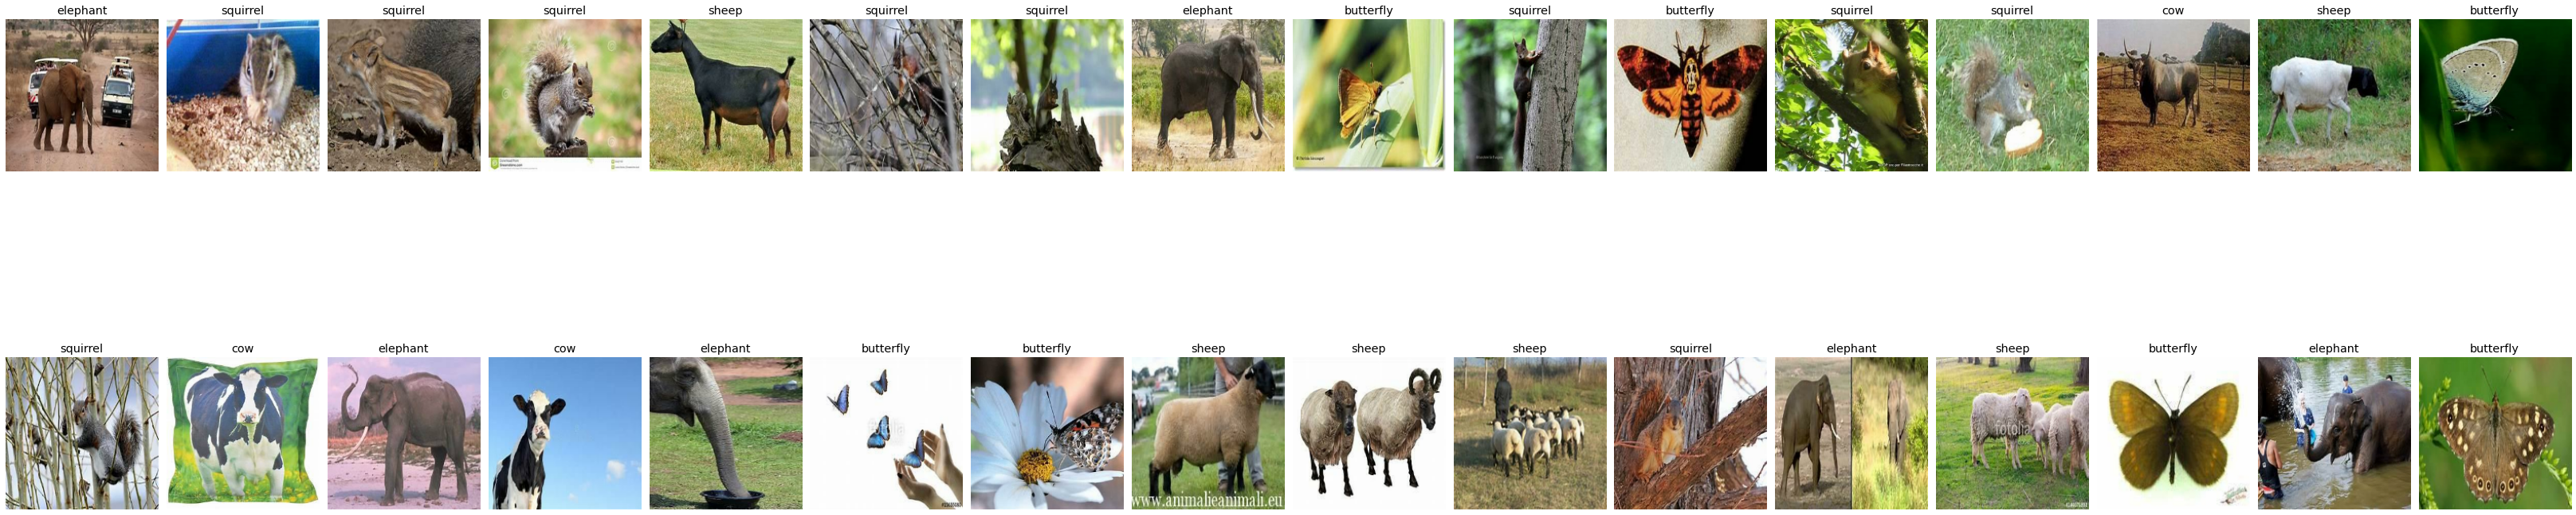

In [10]:
plt.figure(figsize=(45,15))

for images, labels in train_ds.take(1): # gets a batch of first BATCH_SIZE images
    
    for i in range(32):
        
        plt.subplot(2,int(16),i+1)
        
        plt.grid(False)
        
        plt.imshow(images[i].numpy().astype("uint8")) # image_size has converted these images to float
        
        plt.title(class_names[labels[i]])
        
        plt.axis("off")
    
    plt.tight_layout()
    
    plt.show()

####Plotting training and testing datasets:-

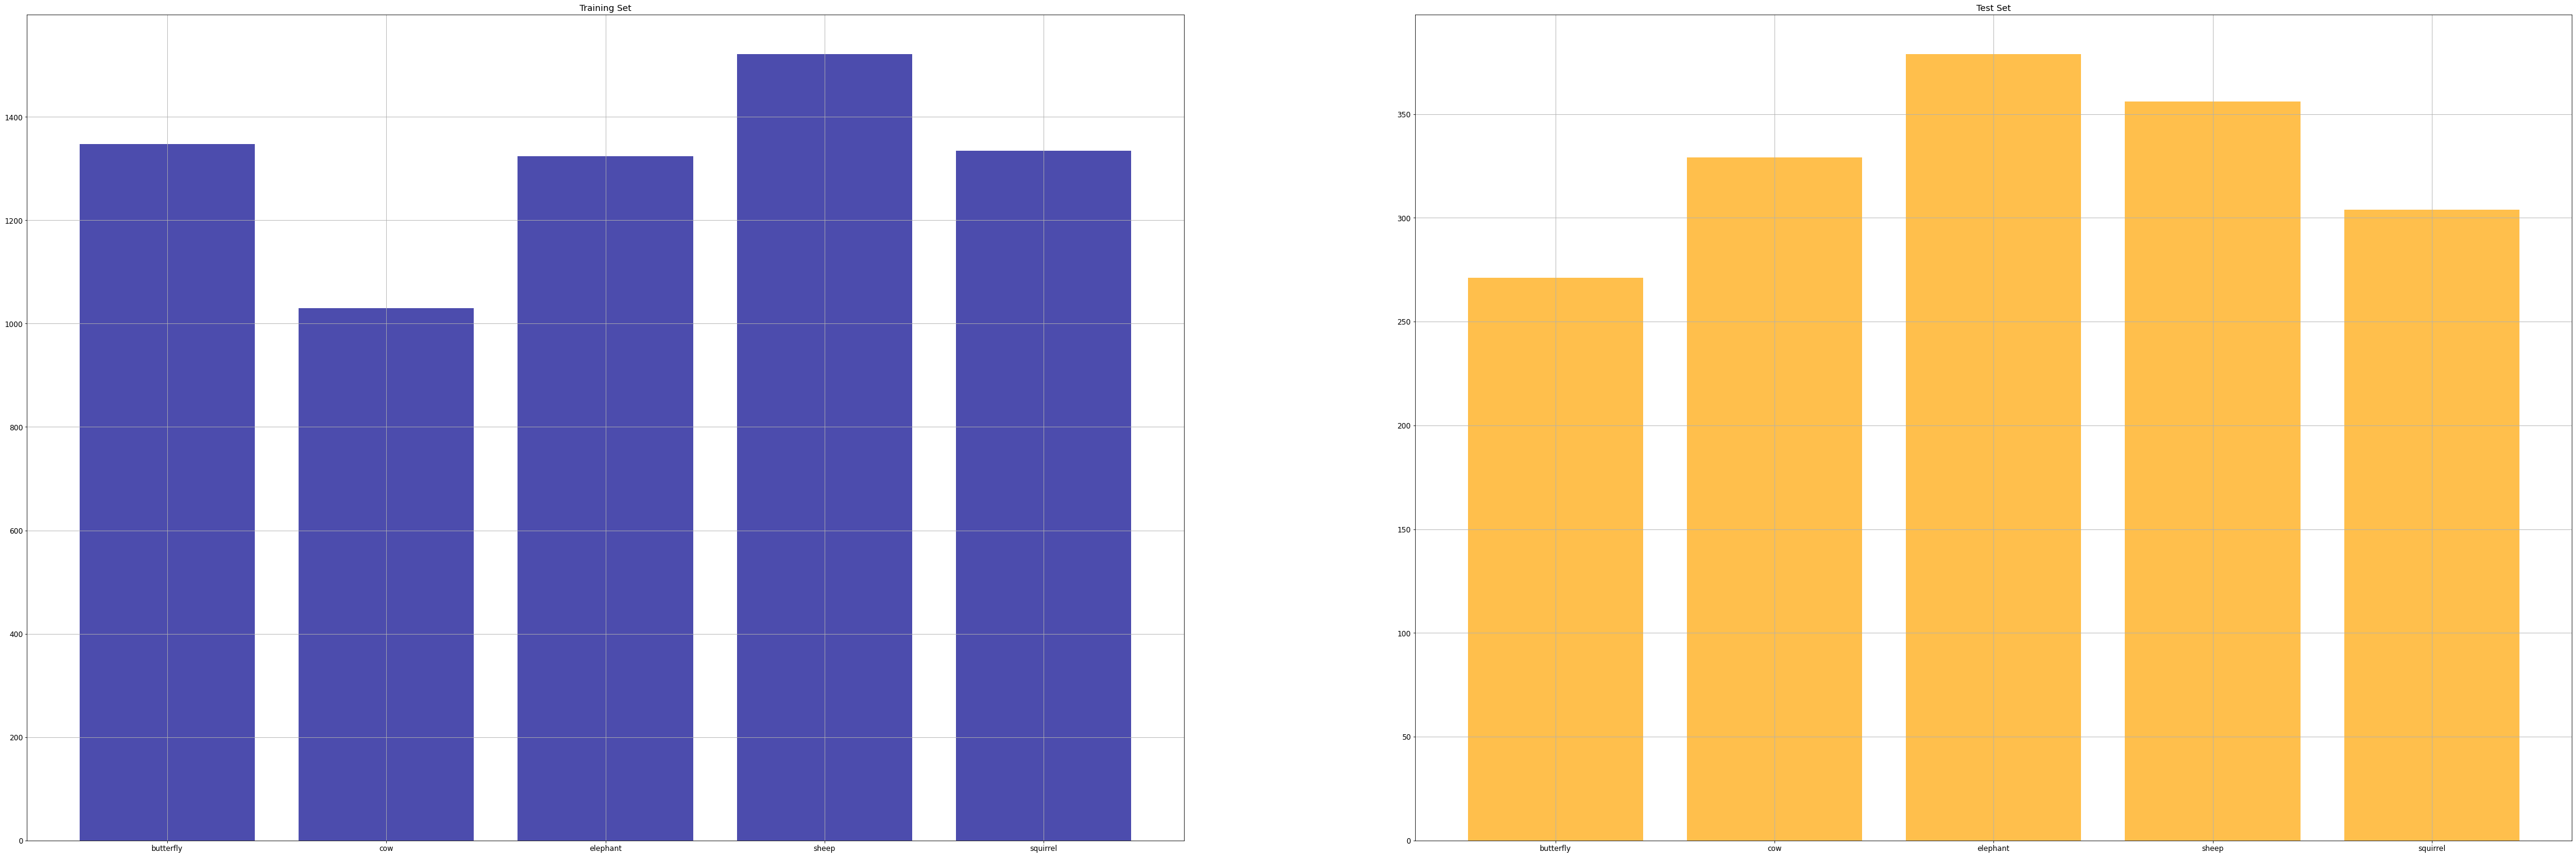

In [11]:
fn_plot_label(train_ds, test_ds)

In [12]:
def split_feature_label(row):
    
    features = tf.reshape(row[1:], [128, 128, 3])
    
    labels = row[0]
    
    return features, labels

In [13]:
## Optimize for performance

train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

#1.5. Prepare your model¶
**Task 4**: (10 marks)

You can use DenseNet from tensorflow.keras.applications or any equivalent pre-trained.
In [ ]:

####Solutions:-

In [14]:

IMG_SHAPE = (IMG_WIDTH,IMG_HEIGHT) + (3,)
base_model = tf.keras.applications.densenet.DenseNet169(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')



51877672/51877672 [==============================] - 1s 0us/step


In [15]:

base_model.trainable = False

In [16]:
base_model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 188, 188, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 194, 194, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 94, 94, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 94, 94, 64)   256         ['conv1/conv[0][0]']   

In [17]:

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255)
])


In [18]:
data_augmentation = tf.keras.Sequential(
  [ 
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation((-0.1,0.1)),
    tf.keras.layers.RandomZoom(-0.1,0.1),
  ]
)

In [19]:
dor1 = 0.3
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  base_model,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dropout(rate = dor1, seed=RANDOM_STATE),                                                
  tf.keras.layers.Dense(5,activation='softmax')
 
])


In [20]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=5,verbose=1,factor=0.3)


checkpoint_filepath = r'C:\Users\Satyam\Downloads\checkpoint\model.h5'
m = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='auto',
    save_best_only=True)


early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6)

#1.6. Compile and Fit your model¶
**Task 5**: Plot loss and accuracy curves for both testing and training. (30 marks)

In [ ]:

####Solutions:-

In [21]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.00001),
              
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              
              metrics=['accuracy'])

In [22]:

history = model.fit(train_ds,
                    epochs=60,
                    batch_size=BATCH_SIZE,
                    validation_data=test_ds,callbacks = [red_lr,m,early])

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


205/205 [==============================] - 60s 179ms/step - loss: 0.4908 - accuracy: 0.8403 - val_loss: 0.1489 - val_accuracy: 0.9481 - lr: 1.0000e-05
Epoch 2/60
205/205 [==============================] - 26s 129ms/step - loss: 0.2246 - accuracy: 0.9212 - val_loss: 0.1200 - val_accuracy: 0.9579 - lr: 1.0000e-05
Epoch 3/60
205/205 [==============================] - 26s 127ms/step - loss: 0.1738 - accuracy: 0.9381 - val_loss: 0.1141 - val_accuracy: 0.9610 - lr: 1.0000e-05
Epoch 4/60
205/205 [==============================] - 26s 127ms/step - loss: 0.1438 - accuracy: 0.9480 - val_loss: 0.1044 - val_accuracy: 0.9701 - lr: 1.0000e-05
Epoch 5/60
205/205 [==============================] - 25s 122ms/step - loss: 0.1234 - accuracy: 0.9535 - val_loss: 0.1073 - val_accuracy: 0.9671 - lr: 1.0000e-05
Epoch 6/60
205/205 [==============================] - 25s 123ms/step - loss: 0.1169 - accuracy: 0.9581 - val_loss: 0.1105 - val_accuracy: 0.9658 - lr: 1.0000e-05
Epoch 7/60
205/205 [===================

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 188, 188, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 188, 188, 3)       0         
                                                                 
 densenet169 (Functional)    (None, 5, 5, 1664)        12642880  
                                                                 
 flatten (Flatten)           (None, 41600)             0         
                                                                 
 dense (Dense)               (None, 512)               21299712  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                

In [24]:
res_df = pd.DataFrame(history.history)
res_df

,loss,accuracy,val_loss,val_accuracy,lr
0,0.490795,0.840323,0.148948,0.948139,0.000010
1,0.224617,0.921153,0.120010,0.957901,0.000010
2,0.173768,0.938081,0.114105,0.960952,0.000010
3,0.143772,0.947995,0.104418,0.970104,0.000010
4,0.123399,0.953485,0.107301,0.967053,0.000010
5,0.116935,0.958060,0.110532,0.965833,0.000010
6,0.104588,0.963245,0.105135,0.968883,0.000010
7,0.092609,0.967821,0.104662,0.966443,0.000010
8,0.081444,0.972548,0.107657,0.965223,0.000010
9,0.077565,0.975294,0.103712,0.970104,0.000003


####Plotting accuracy and loss curves:-

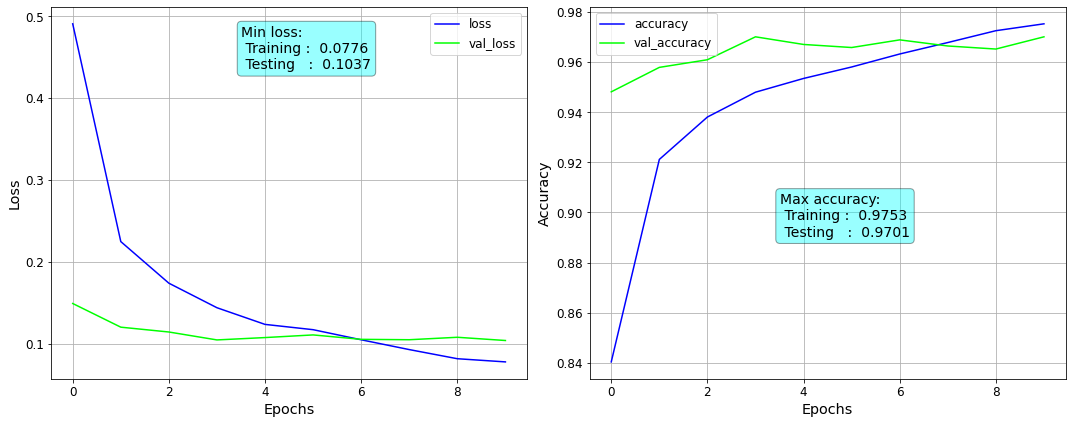

In [25]:
fn_plot_hist(res_df)

######Prediction accuracy result:-

In [26]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

52/52 - 4s - loss: 0.1037 - accuracy: 0.9701 - 4s/epoch - 80ms/step


In [27]:
#yhat = model.predict(X_test, batch_size=n_batch)
yhat = model.predict(test_ds)

52/52 [==============================] - 7s 81ms/step


In [28]:
y_test = tf.concat([y for x, y in test_ds], axis=0).numpy()

In [29]:
y_pred = yhat.argmax(axis = 1)

print('Accuracy score on Test Data :', accuracy_score(y_test, y_pred))

Accuracy score on Test Data : 0.9701037217815741


In [30]:
confusion_matrix(y_test, y_pred)

array([[376,   1,   1,   0,   1],
       [  0, 340,   4,  10,   2],
       [  1,   2, 267,   1,   0],
       [  0,  13,   2, 287,   2],
       [  4,   0,   1,   4, 320]])

#CONFUSION MATRIX:-

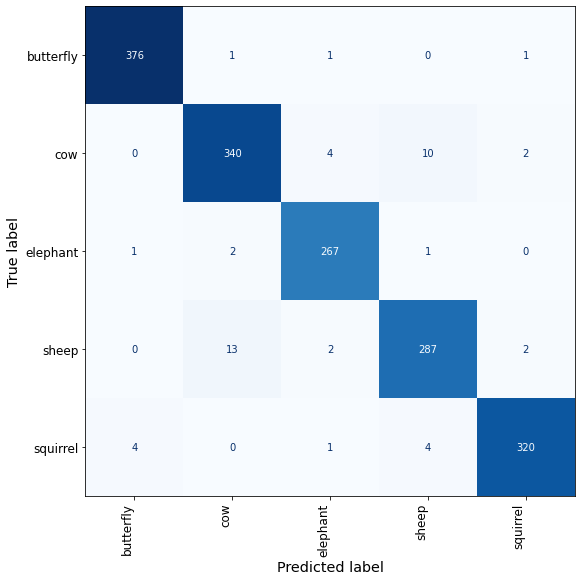

In [31]:
CMAP = plt.cm.Blues

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=class_names)

fig, ax = plt.subplots(figsize = (9,9))

disp.plot(ax = ax, cmap=CMAP, colorbar=False);

ax.set_xticklabels(class_names,rotation=90, ha='right');

#DESIRED RESULT OF CLASSIFICATION REPORT:-

In [32]:
from sklearn.metrics import classification_report
target_names = ['butterfly','cow','elephant','sheep','squirrel']

print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

   butterfly       0.99      0.99      0.99       379
         cow       0.96      0.96      0.96       356
    elephant       0.97      0.99      0.98       271
       sheep       0.95      0.94      0.95       304
    squirrel       0.98      0.97      0.98       329

    accuracy                           0.97      1639
   macro avg       0.97      0.97      0.97      1639
weighted avg       0.97      0.97      0.97      1639



## Save the model

In [33]:
from tensorflow.keras.models import Sequential, save_model
save_model(model, 'animal_model_trained.hdf5')
print("Model Saved")

Model Saved


In [34]:
'''# save model
model.save('animal_classification.h5')
print('Model Saved!')
from tensorflow.keras.models import load_model
# load model
savedModel=load_model('animal_classification.h5')
savedModel.summary()'''

"# save model\nmodel.save('animal_classification.h5')\nprint('Model Saved!')\nfrom tensorflow.keras.models import load_model\n# load model\nsavedModel=load_model('animal_classification.h5')\nsavedModel.summary()"